In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
rng = np.random.default_rng()
dist = stats.norm(loc=2, scale=4)  # our "unknown" distribution
data = dist.rvs(size=100, random_state=rng)

In [ ]:
std_true = dist.std()      # the true value of the statistic
print(std_true)

In [ ]:
std_sample = np.std(data)  # the sample statistic
print(std_sample)

In [ ]:
data = (data,)  # samples must be in a sequence
res = stats.bootstrap(data, np.std, confidence_level=0.9, random_state=rng)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('frequency')
plt.show()

In [ ]:
print(res.standard_error)
res.standard_error == np.std(res.bootstrap_distribution, ddof=1)

In [ ]:
x = np.linspace(3, 5)
pdf = stats.norm.pdf(x, loc=std_sample, scale=res.standard_error)
fig, ax = plt.subplots()
ax.hist(res.bootstrap_distribution, bins=25, density=True)
ax.plot(x, pdf)
ax.set_title('Normal Approximation of the Bootstrap Distribution')
ax.set_xlabel('statistic value')
ax.set_ylabel('pdf')
plt.show()

In [ ]:
stats.norm.interval(0.9, loc=std_sample, scale=res.standard_error)

In [ ]:
print(res.confidence_interval)

In [ ]:
n_trials = 1000
ci_contains_true_std = 0
for i in range(n_trials):
   data = (dist.rvs(size=100, random_state=rng),)
   ci = stats.bootstrap(data, np.std, confidence_level=0.9, n_resamples=1000,
                  random_state=rng).confidence_interval
   if ci[0] < std_true < ci[1]:
       ci_contains_true_std += 1
print(ci_contains_true_std)

In [ ]:
data = (dist.rvs(size=(n_trials, 100), random_state=rng),)
res = stats.bootstrap(data, np.std, axis=-1, confidence_level=0.9,
                n_resamples=1000, random_state=rng)
ci_l, ci_u = res.confidence_interval

In [ ]:
print(ci_l[995:])
print(ci_u[995:])

In [ ]:
print(np.sum((ci_l < std_true) & (std_true < ci_u)))

In [2]:
sample_size = 10000
samples = np.random.exponential(scale=4, size=sample_size)

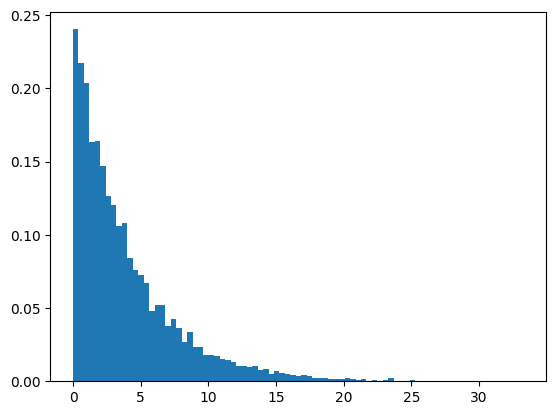

In [3]:
plt.hist(samples, bins='auto', density=True)
plt.show()

In [4]:
bootstrap = samples.reshape(1000, 10)

In [5]:
means = np.mean(bootstrap, axis=1)
np.mean(means)

3.945874881979959

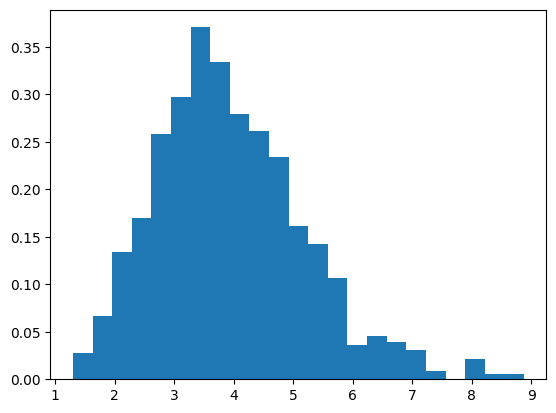

In [6]:
plt.hist(means, bins='auto', density=True)
plt.show()